Reproducing code for learning
notebook: 01_the_machine_learning_landscape.ipynb

In [3]:
# imports, etc
import sys
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
print(sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# matplotlib settings
import matplotlib as plt
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# random seed
import numpy as np
np.random.seed(42)

1.4.0


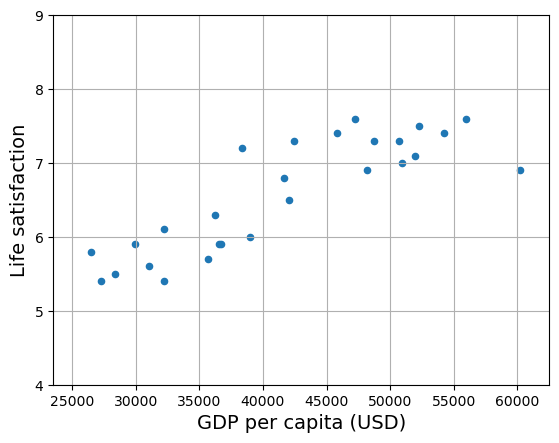

In [4]:
# linear regression example

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# download and prepare data
dataRootFolder = "https://github.com/ageron/data/raw/main/"
lifeSatisfaction = pd.read_csv(dataRootFolder + "lifesat/lifesat.csv")
X = lifeSatisfaction[["GDP per capita (USD)"]].values # features
y = lifeSatisfaction[["Life satisfaction"]].values # target

# visualize data
lifeSatisfaction.plot(kind = 'scatter',
                      grid = True,
                      x = "GDP per capita (USD)",
                      y = "Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

In [5]:
# select and fit models
LinearModel = LinearRegression()
LinearModel.fit(X,y)
KnnModel = KNeighborsRegressor(n_neighbors=3)
KnnModel.fit(X,y)

# predict
X_new = [[37_655.2]] # Cyprus' GDP per capita in 2020
print(f"Linear regression model prediction for Cyprus' life satisfaction is {np.round(LinearModel.predict(X_new)[0][0],decimals=3)}.")
print(f"KNN regression model prediction for Cyprus' life satisfaction is {np.round(KnnModel.predict(X_new)[0][0],decimals=3)}.")

Linear regression model prediction for Cyprus' life satisfaction is 6.302.
KNN regression model prediction for Cyprus' life satisfaction is 6.333.


## Data and figures
Not important but doing to revise basic data manipulation concepts

In [13]:
# function to save figures
from pathlib import Path

IMAGES_PATH = Path() / "images" / "fundamentals"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH /f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [21]:
# downloading raw data
import urllib.request

datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)

data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv","gdp_per_capita.csv"):
    if not (datapath /filename).is_file():
        url = data_root + "lifesat/" + filename
        print(f"Downloading {url} to '{datapath / filename}'")
        urllib.request.urlretrieve(url, datapath / filename)

In [46]:
# read raw features data
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

print("Info raw features data:")
print(gdp_per_capita.info())

# extract needed data
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year] # keep only desired year
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1) # remove unnecessary columns
gdp_per_capita.columns = ["Country", gdppc_col] # rename remaining columns
gdp_per_capita.set_index("Country", inplace=True) # set index to country name

print("\n\n")
print("Info processed features data:")
gdp_per_capita.head()

Info raw features data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 4 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               7109 non-null   object 
 1   Code                                                 5729 non-null   object 
 2   Year                                                 7109 non-null   int64  
 3   GDP per capita, PPP (constant 2017 international $)  7109 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 222.3+ KB
None



Info processed features data:


,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [47]:
# read raw target data
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")

print("Info raw target data:")
print(oecd_bli.info())

# extract needed data
lifesat_col = "Life satisfaction"

oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"] # keep only total values?
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

print("\n\n")
print("Info processed target data:")
oecd_bli.head()

Info raw target data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               2369 non-null   object 
 1   Country                2369 non-null   object 
 2   INDICATOR              2369 non-null   object 
 3   Indicator              2369 non-null   object 
 4   MEASURE                2369 non-null   object 
 5   Measure                2369 non-null   object 
 6   INEQUALITY             2369 non-null   object 
 7   Inequality             2369 non-null   object 
 8   Unit Code              2369 non-null   object 
 9   Unit                   2369 non-null   object 
 10  PowerCode Code         2369 non-null   int64  
 11  PowerCode              2369 non-null   object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  2369 non-nu

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [49]:
# merge features and target data
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]
full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5
